In [3]:
import ollama
import sys
import pillow_avif

In [2]:
!{sys.executable} -m pip install pillow-avif-plugin

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 10.6/10.6 MB 54.8 MB/s eta 0:00:00


In [ ]:
from PIL import Image
from glob import glob

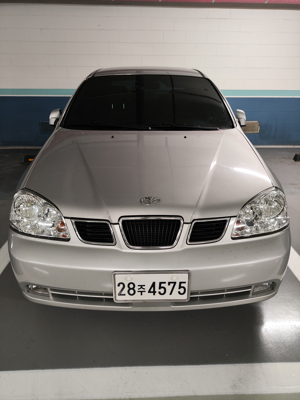

In [ ]:
Image.open('IMG_20230805_110424.jpg').resize((300,400))

In [8]:
glob('./*.jpg')

['.\\IMG_20230805_110424.jpg']

In [50]:
response = ollama.chat(
    model= "llama3.2-vision",
    messages=[
        {"role":"user",
         "content":"please describe the image, answer in korean ",
         "images":["IMG_20230805_110424.jpg"]
        }
    ]
)

In [51]:
response

ChatResponse(model='llama3.2-vision', created_at='2024-12-25T17:35:24.7439863Z', done=True, done_reason='stop', total_duration=83035870900, load_duration=11456427400, prompt_eval_count=22, prompt_eval_duration=7678000000, eval_count=179, eval_duration=62955000000, message=Message(role='assistant', content="The image shows a silver car parked in a garage or indoor parking lot. The car is facing forward, with its front end visible.\n\n*   **Car:**\n    *   Color: Silver\n    *   Model: Not specified\n    *   License plate number: 28조4575 (Korean license plate format)\n    *   Korean characters on the license plate indicate it belongs to a domestic vehicle in South Korea.\n*   **Background:**\n    *   Garage or indoor parking lot\n    *   White and blue wall with a red stripe at the top\n    *   The floor appears to be made of concrete or a similar material\n\nThe image provides a clear view of the car's front end, including its grille, headlights, and license plate. The background sugges

In [52]:
print(response["message"]["content"])

The image shows a silver car parked in a garage or indoor parking lot. The car is facing forward, with its front end visible.

*   **Car:**
    *   Color: Silver
    *   Model: Not specified
    *   License plate number: 28조4575 (Korean license plate format)
    *   Korean characters on the license plate indicate it belongs to a domestic vehicle in South Korea.
*   **Background:**
    *   Garage or indoor parking lot
    *   White and blue wall with a red stripe at the top
    *   The floor appears to be made of concrete or a similar material

The image provides a clear view of the car's front end, including its grille, headlights, and license plate. The background suggests that the car is parked in a secure location, possibly a private garage or indoor parking facility.


In [49]:
import requests
import json
import base64

API_URL = "https://stunning-pangolin-lately.ngrok-free.app/api/generate"
MODEL_NAME = "llama3.2-vision"
# 이미지 파일을 읽어서 base64로 인코딩
with open('IMG_20230805_110424.jpg', 'rb') as image_file:
    image_data = base64.b64encode(image_file.read()).decode('utf-8')
messages=[
    {"role":"user",
     "content":"please describe the image",
    }
]
payload = {
    "model": MODEL_NAME,
    "messages": messages
}
# API에 POST 요청 보내기
headers = {'Content-Type': 'application/json'}
try:
    response = requests.post(API_URL, headers=headers, data=json.dumps(payload), timeout=300)

    # 응답 처리
    if response.status_code == 200:
        result = response.json()
        print("API 응답:")
        print(result)
        
        # 응답에서 에러 확인
        if 'error' in result:
            print("에러 발생:")
            print(result['error'])
        else:
            # 모델의 응답 출력
            print("모델 응답:")
            print(result.get('response', '응답 없음'))
            print("처리 완료 이유:", result.get('done_reason', '알 수 없음'))
    else:
        print(f"요청 실패: 상태 코드 {response.status_code}")
        print("응답 내용:")
        print(response.text)
except requests.exceptions.Timeout:
    print("요청 시간 초과")
except requests.exceptions.RequestException as e:
    print(f"요청 예외 발생: {e}")

API 응답:
{'model': 'llama3.2-vision', 'created_at': '2024-12-25T17:32:27.1354219Z', 'response': '', 'done': True, 'done_reason': 'load'}
모델 응답:

처리 완료 이유: load
